<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/08_pytorch_paper_replicating_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. PyTorch Paper Replicating Exercises

Welcome to the 08. PyTorch Paper Replicating exercises.

Your objective is to write code to satisify each of the exercises below.

Some starter code has been provided to make sure you have all the resources you need.

> **Note:** There may be more than one solution to each of the exercises.

## Resources

1. These exercises/solutions are based on [section 08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/tjpW_BY8y3g) (but try the exercises yourself first!).
3. See [all solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

> **Note:** The first section of this notebook is dedicated to getting various helper functions and datasets used for the exercises. The exercises start at the heading "Exercise 1: ...".

### Get various imports and helper functions

The code in the following cells prepares imports and data for the exercises below. They are taken from [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/). 

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")


[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu113
torch version: 2.9.1+cu130
torchvision version: 0.24.1+cu130


In [4]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

from going_modular import data_setup
import engine
from helper_functions import download_data, set_seeds, plot_loss_curves

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get data

Want to download the data we've been using in PyTorch Paper Replicating: https://www.learnpytorch.io/08_pytorch_paper_replicating/#1-get-data

In [6]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

In [7]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

### Preprocess data

Turn images into tensors using same code as PyTorch Paper Replicating section 2.1 and 2.2: https://www.learnpytorch.io/08_pytorch_paper_replicating/#21-prepare-transforms-for-images

In [8]:
# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [9]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x12813e59700>,
 ['pizza', 'steak', 'sushi'])

In [10]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

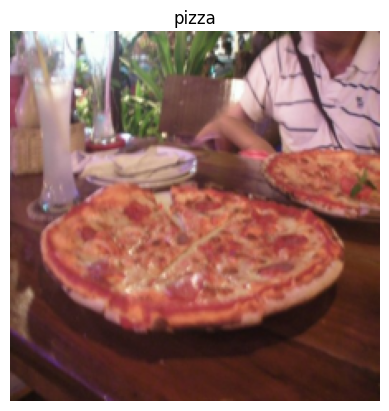

In [11]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

## 1. Replicate the ViT architecture we created with in-built [PyTorch transformer layers](https://pytorch.org/docs/stable/nn.html#transformer-layers).

* You'll want to look into replacing our `TransformerEncoderBlock()` class with [`torch.nn.TransformerEncoderLayer()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer) (these contain the same layers as our custom blocks). 
* You can stack `torch.nn.TransformerEncoderLayer()`'s on top of each other with [`torch.nn.TransformerEncoder()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder).

In [ ]:
class ViT(nn.Module):
    """Creates ViT model architecture."""
    def __init__(self,
                 img_size:int=224, # Training resolution from Table 3 in ViT paper
                 in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                 num_transformer_layers:int=12, # Layers from Table 1 for ViT-Base
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0, # Dropout for attention projection
                 mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                 num_classes:int=1000):
        super().__init__()
        # Calculate number of patches
        assert img_size % patch_size == 0, "Image size must be divisible by patch size"
        self.num_patches = (img_size // patch_size) ** 2
        self.patch_size = patch_size
        self.embedding_dim = embedding_dim
        # Create patch embedding layer
        self.patch_embedding = nn.Conv2d(in_channels=in_channels,
                                         out_channels=embedding_dim,
                                         kernel_size=patch_size,
                                         stride=patch_size)
        # Create class token parameter
        self.class_token = nn.Parameter(torch.randn(1, 1, embedding_dim))
        # Create position embedding parameter
        self.position_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embedding_dim))
        # Create embedding dropout layer
        self.embedding_dropout = nn.Dropout(embedding_dropout)
        # Create transformer encoder layers
        self.transformer_layers = nn.Sequential(*[nn.TransformerEncoderLayer(
            d_model=embedding_dim,
            nhead=num_heads,
            dim_feedforward=mlp_size,
            dropout=mlp_dropout,
            activation="gelu",
            batch_first=True
        ) for _ in range(num_transformer_layers) ])
        # Create classification head
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(embedding_dim),
            nn.Linear(embedding_dim, num_classes)
        )
    def forward(self, x):
        batch_size = x.shape[0]
        class_token = self.class_token.expand(batch_size, -1, -1) # (batch_size, 1, embedding_dim)
        x = self.patch_embedding(x) # (batch_size, embedding_dim, num_patches_sqrt, num_patches_sqrt)

## 2. Turn the custom ViT architecture we created into a Python script, for example, `vit.py`.

* You should be able to import an entire ViT model using something like`from vit import ViT`.
* We covered the art of turning code cells into Python scrips in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/). 


In [13]:
%%writefile vit.py
import torch
from torch import nn 

# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.
    
    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """ 
    # 2. Initialize the class with appropriate variables
    def __init__(self, 
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()
        
        self.patch_size = patch_size
        
        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method 
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % self.patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"
        
        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched) 
        # 6. Make sure the output shape has the right order 
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

class ViT(nn.Module): 
  def __init__(self,
               img_size=224, # from Table 3
               num_channels=3,
               patch_size=16,
               embedding_dim=768, # from Table 1
               dropout=0.1, 
               mlp_size=3072, # from Table 1
               num_transformer_layers=12, # from Table 1
               num_heads=12, # from Table 1 (number of multi-head self attention heads)
               num_classes=1000): # generic number of classes (this can be adjusted)
    super().__init__()

    # Assert image size is divisible by patch size 
    assert img_size % patch_size == 0, "Image size must be divisble by patch size."

    # 1. Create patch embedding
    self.patch_embedding = PatchEmbedding(in_channels=num_channels,
                                          patch_size=patch_size,
                                          embedding_dim=embedding_dim)

    # 2. Create class token
    self.class_token = nn.Parameter(torch.randn(1, 1, embedding_dim),
                                    requires_grad=True)

    # 3. Create positional embedding
    num_patches = (img_size * img_size) // patch_size**2 # N = HW/P^2
    self.positional_embedding = nn.Parameter(torch.randn(1, num_patches+1, embedding_dim))

    # 4. Create patch + position embedding dropout 
    self.embedding_dropout = nn.Dropout(p=dropout)

    # # 5. Create Transformer Encoder layer (single)
    # self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim,
    #                                                             nhead=num_heads,
    #                                                             dim_feedforward=mlp_size,
    #                                                             activation="gelu",
    #                                                             batch_first=True,
    #                                                             norm_first=True)

    # 5. Create stack Transformer Encoder layers (stacked single layers)
    self.transformer_encoder = nn.TransformerEncoder(encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                                                              nhead=num_heads,
                                                                                              dim_feedforward=mlp_size,
                                                                                              activation="gelu",
                                                                                              batch_first=True,
                                                                                              norm_first=True), # Create a single Transformer Encoder Layer
                                                     num_layers=num_transformer_layers) # Stack it N times

    # 7. Create MLP head
    self.mlp_head = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
                  out_features=num_classes)
    )

  def forward(self, x):
    # Get some dimensions from x
    batch_size = x.shape[0]

    # Create the patch embedding
    x = self.patch_embedding(x)

    # First, expand the class token across the batch size
    class_token = self.class_token.expand(batch_size, -1, -1) # "-1" means infer the dimension

    # Prepend the class token to the patch embedding
    x = torch.cat((class_token, x), dim=1)

    # Add the positional embedding to patch embedding with class token
    x = self.positional_embedding + x

    # Dropout on patch + positional embedding
    x = self.embedding_dropout(x)

    # Pass embedding through Transformer Encoder stack
    x = self.transformer_encoder(x)

    # Pass 0th index of x through MLP head
    x = self.mlp_head(x[:, 0])

    return x

Overwriting vit.py


## 3. Train a pretrained ViT feature extractor model (like the one we made in [08. PyTorch Paper Replicating section 10](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-bring-in-pretrained-vit-from-torchvisionmodels-on-same-dataset)) on 20% of the pizza, steak and sushi data like the dataset we used in [07. PyTorch Experiment Tracking section 7.3](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#73-download-different-datasets) 
* See how it performs compared to the EffNetB2 model we compared it to in [08. PyTorch Paper Replicating section 10.6](https://www.learnpytorch.io/08_pytorch_paper_replicating/#106-save-feature-extractor-vit-model-and-check-file-size).

In [15]:
from vit import ViT

# Get data
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

# Get ViT weights and transforms from torchvision
vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# pretrained ViT model
pretrained_vit_model = torchvision.models.vit_b_16(weights=vit_weights).to(device)

# freeze all layers
for param in pretrained_vit_model.parameters():
    param.requires_grad = False
# change classification head
set_seeds()
pretrained_vit_model.heads = nn.Linear(in_features=768,
                         out_features=len(class_names)).to(device)

# ViT transforms
vit_pretrained_transforms = vit_weights.transforms()
print(f"ViT pretrained transforms: {vit_pretrained_transforms}")


# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=vit_pretrained_transforms,
    batch_size=BATCH_SIZE
)
# Optimizer
optimizer = torch.optim.Adam(params=pretrained_vit_model.parameters(),
                             lr=3e-4)

# Loss fn
loss_fn = nn.CrossEntropyLoss()

set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit_model,
                             train_dataloader=train_dataloader,
                             test_dataloader=test_dataloader,
                             optimizer=optimizer,
                             loss_fn=loss_fn,
                             epochs=10,
                             device=device)

[INFO] data\pizza_steak_sushi_20_percent directory exists, skipping download.
ViT pretrained transforms: ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9567 | train_acc: 0.5687 | test_loss: 0.7428 | test_acc: 0.7665
Epoch: 2 | train_loss: 0.5925 | train_acc: 0.8646 | test_loss: 0.5052 | test_acc: 0.9017
Epoch: 3 | train_loss: 0.4383 | train_acc: 0.9271 | test_loss: 0.3719 | test_acc: 0.9415
Epoch: 4 | train_loss: 0.3159 | train_acc: 0.9354 | test_loss: 0.2932 | test_acc: 0.9477
Epoch: 5 | train_loss: 0.2761 | train_acc: 0.9500 | test_loss: 0.2462 | test_acc: 0.9477
Epoch: 6 | train_loss: 0.2654 | train_acc: 0.9208 | test_loss: 0.2105 | test_acc: 0.9631
Epoch: 7 | train_loss: 0.2063 | train_acc: 0.9479 | test_loss: 0.1881 | test_acc: 0.9722
Epoch: 8 | train_loss: 0.2223 | train_acc: 0.9208 | test_loss: 0.1710 | test_acc: 0.9631
Epoch: 9 | train_loss: 0.1948 | train_acc: 0.9604 | test_loss: 0.1594 | test_acc: 0.9693
Epoch: 10 | train_loss: 0.1751 | train_acc: 0.9625 | test_loss: 0.1455 | test_acc: 0.9693


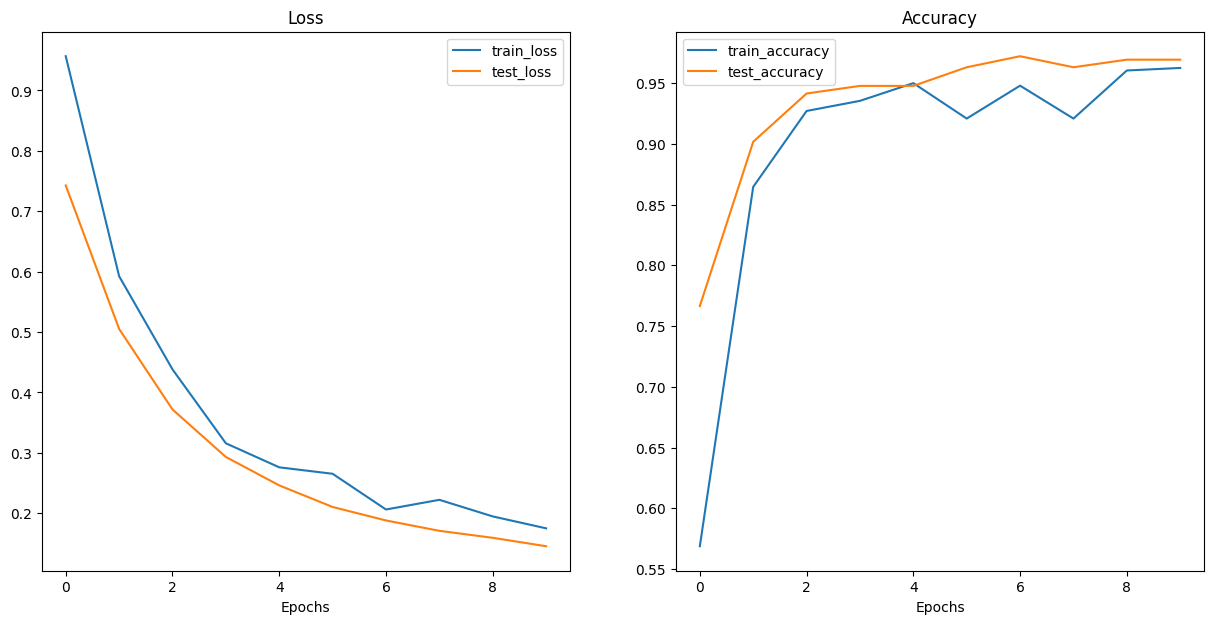

In [16]:
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

## 4. Try repeating the steps from excercise 3 but this time use the "`ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1`" pretrained weights from [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16).
* Note: ViT pretrained with SWAG weights has a minimum input image size of (384, 384), though this is accessible in the weights `.transforms()` method.

In [17]:
# get ViT pretrained weights
vit_weights_imagenet = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1
pretrained_vit_imagenet_model = torchvision.models.vit_b_16(weights=vit_weights_imagenet)
# freeze all layers
for param in pretrained_vit_imagenet_model.parameters():
    param.requires_grad = False
# change classification head
set_seeds()
pretrained_vit_imagenet_model.heads = nn.Linear(in_features=768,
                         out_features=len(class_names))

pretrained_vit_imagenet_model = pretrained_vit_imagenet_model.to(device)

# get transforms
vit_pretrained_imagenet1k_transforms = vit_weights_imagenet.transforms()
print(f"ViT pretrained transforms (Imagenet1k): {vit_pretrained_imagenet1k_transforms}")

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=vit_pretrained_imagenet1k_transforms,
    batch_size=BATCH_SIZE
)

# Optimizer
optimizer = torch.optim.Adam(params=pretrained_vit_imagenet_model.parameters(),
                             lr=3e-4)
# Loss fn
loss_fn = nn.CrossEntropyLoss()
set_seeds()
pretrained_vit_imagenet1k_results = engine.train(model=pretrained_vit_imagenet_model,
                             train_dataloader=train_dataloader,
                             test_dataloader=test_dataloader,
                             optimizer=optimizer,
                             loss_fn=loss_fn,
                             epochs=10,
                             device=device)

Downloading: "https://download.pytorch.org/models/vit_b_16_swag-9ac1b537.pth" to C:\Users\pmaur/.cache\torch\hub\checkpoints\vit_b_16_swag-9ac1b537.pth


100%|██████████| 331M/331M [00:22<00:00, 15.5MB/s] 


ViT pretrained transforms (Imagenet1k): ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6483 | train_acc: 0.8021 | test_loss: 0.2122 | test_acc: 1.0000
Epoch: 2 | train_loss: 0.1834 | train_acc: 0.9792 | test_loss: 0.1016 | test_acc: 1.0000
Epoch: 3 | train_loss: 0.1105 | train_acc: 0.9854 | test_loss: 0.0597 | test_acc: 1.0000
Epoch: 4 | train_loss: 0.0772 | train_acc: 0.9875 | test_loss: 0.0419 | test_acc: 1.0000
Epoch: 5 | train_loss: 0.0646 | train_acc: 0.9854 | test_loss: 0.0336 | test_acc: 1.0000
Epoch: 6 | train_loss: 0.0567 | train_acc: 0.9896 | test_loss: 0.0277 | test_acc: 1.0000
Epoch: 7 | train_loss: 0.0476 | train_acc: 0.9917 | test_loss: 0.0233 | test_acc: 1.0000
Epoch: 8 | train_loss: 0.0539 | train_acc: 0.9917 | test_loss: 0.0207 | test_acc: 1.0000
Epoch: 9 | train_loss: 0.0384 | train_acc: 0.9938 | test_loss: 0.0205 | test_acc: 1.0000
Epoch: 10 | train_loss: 0.0364 | train_acc: 0.9938 | test_loss: 0.0178 | test_acc: 1.0000


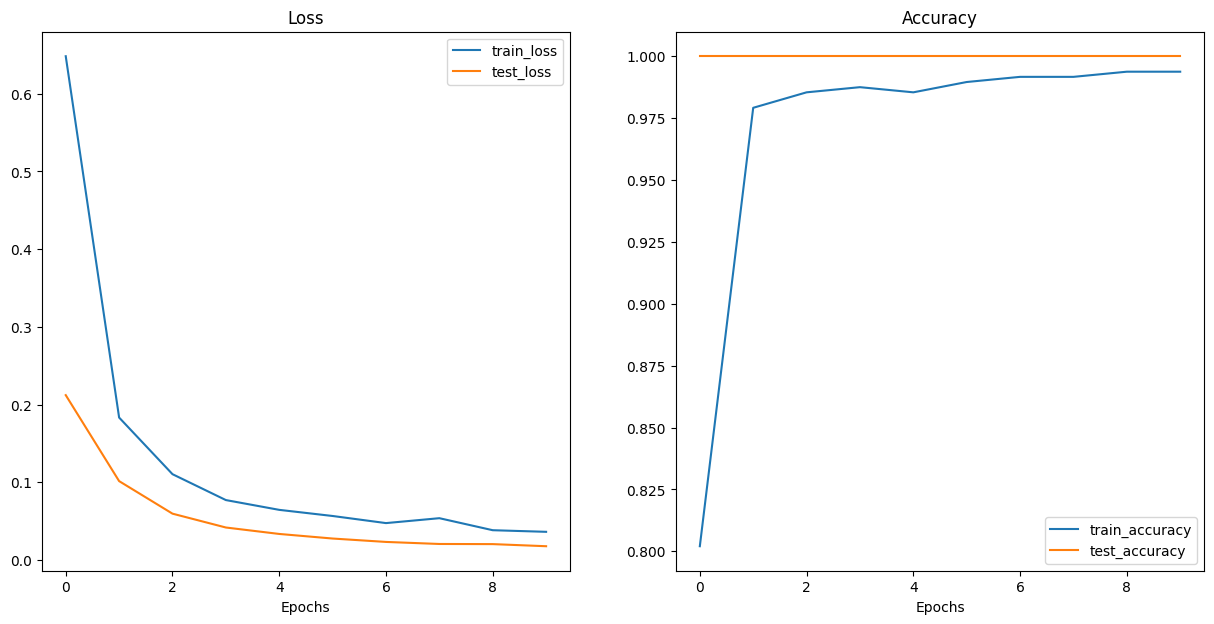

In [18]:
plot_loss_curves(pretrained_vit_imagenet1k_results)

# 5. Our custom ViT model architecture closely mimics that of the ViT paper, however, our training recipe misses a few things. 
* Research some of the following topics from Table 3 in the ViT paper that we miss and write a sentence about each and how it might help with training:
    * **ImageNet-21k pretraining** 
    * **Learning rate warmup** 
    * **Learning rate decay** 
    * **Gradient clipping** 

In [15]:
# TODO: your explanations of the above terms